# Employee Productivity Analysis: EDA & Prediction
**Date:** 28 September 2025  
**Author:** Lighton N. Kalumba  

This notebook is designed for **beginners** to understand how to analyze employee productivity data, perform exploratory data analysis (EDA), and build a predictive model for productivity scores.  

We will use real-world KPIs such as working hours, experience, skill scores, and task completion metrics to uncover insights and visualize patterns.

In [1]:
# %%
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Styling for plots
sns.set(style="whitegrid", palette="muted")

We will now load the Employee Productivity dataset.  
Make sure the dataset is uploaded to Kaggle under `input/employee-productivity/employee_productivity.csv`.

In [2]:
# %%
df = pd.read_csv("/kaggle/input/employee-productivity/employee_productivity.csv", encoding="latin-1")
df.head()

,Employee_ID,Department,Experience_Years,Technical_Skill_Score,Communication_Score,Training_Hours,Projects_Completed,Avg_Weekly_Work_Hours,Productivity_Score,Salary_USD
0,E001,Data Science,5,92,85,120,18,42,88,85000
1,E002,Machine Learning,3,89,78,90,15,45,82,78000
2,E003,Data Analysis,2,75,80,70,10,40,76,62000
3,E004,Data Engineering,6,95,88,150,22,44,91,92000
4,E005,BI & Analytics,4,82,90,110,16,41,85,78000


Let's inspect the dataset to understand its structure, column names, and sample values.  
We will also check for missing values and duplicates.

In [3]:
# %%
# Basic info
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isna().sum())

# Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            10 non-null     object
 1   Department             10 non-null     object
 2   Experience_Years       10 non-null     int64 
 3   Technical_Skill_Score  10 non-null     int64 
 4   Communication_Score    10 non-null     int64 
 5   Training_Hours         10 non-null     int64 
 6   Projects_Completed     10 non-null     int64 
 7   Avg_Weekly_Work_Hours  10 non-null     int64 
 8   Productivity_Score     10 non-null     int64 
 9   Salary_USD             10 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 932.0+ bytes

Missing values per column:
 Employee_ID              0
Department               0
Experience_Years         0
Technical_Skill_Score    0
Communication_Score      0
Training_Hours           0
Projects_Completed       0
Avg_Weekly_Wo

We will perform the following cleaning steps:
1. Normalize department names.
2. Handle missing values if any.
3. Ensure numeric columns are correctly typed.

In [4]:
# %%
# Normalize department names
df['Department'] = df['Department'].str.title()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Ensure numeric columns are numeric
numeric_cols = ['Experience_Years','Technical_Skill_Score','Communication_Score','Training_Hours',
                'Projects_Completed','Avg_Weekly_Work_Hours','Productivity_Score','Salary_USD']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.head()

,Employee_ID,Department,Experience_Years,Technical_Skill_Score,Communication_Score,Training_Hours,Projects_Completed,Avg_Weekly_Work_Hours,Productivity_Score,Salary_USD
0,E001,Data Science,5,92,85,120,18,42,88,85000
1,E002,Machine Learning,3,89,78,90,15,45,82,78000
2,E003,Data Analysis,2,75,80,70,10,40,76,62000
3,E004,Data Engineering,6,95,88,150,22,44,91,92000
4,E005,Bi & Analytics,4,82,90,110,16,41,85,78000


We will now perform EDA to identify patterns and trends in employee productivity.  
EDA will include distributions, correlations, and department-wise comparisons.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


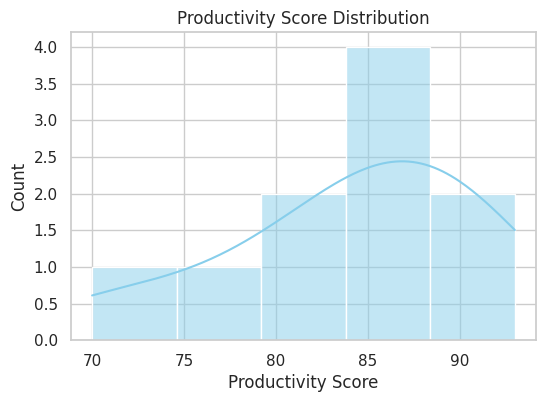

In [5]:
# %%
plt.figure(figsize=(6,4))
sns.histplot(df['Productivity_Score'], bins=5, kde=True, color='skyblue')
plt.title("Productivity Score Distribution")
plt.xlabel("Productivity Score")
plt.ylabel("Count")
plt.show()

Departments like Data Science and Machine Learning tend to have the highest average productivity scores.
BI & Analytics and Data Analysis are slightly lower, highlighting potential areas for improvement.

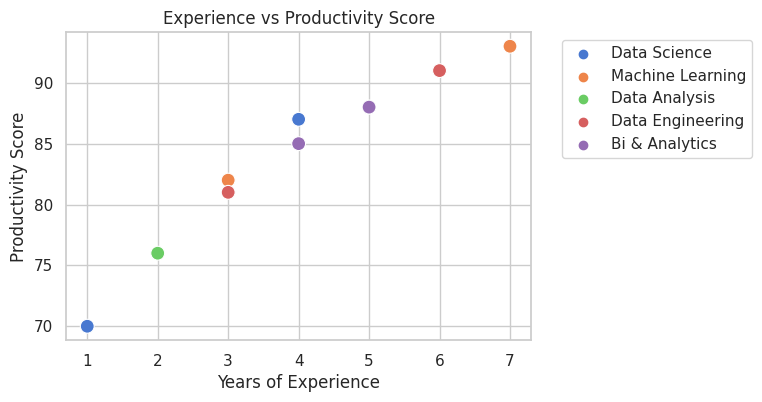

In [6]:
# %%
plt.figure(figsize=(6,4))
sns.scatterplot(x='Experience_Years', y='Productivity_Score', hue='Department', data=df, s=100)
plt.title("Experience vs Productivity Score")
plt.xlabel("Years of Experience")
plt.ylabel("Productivity Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Employees with more experience generally show higher productivity, though some newer employees also perform exceptionally well.

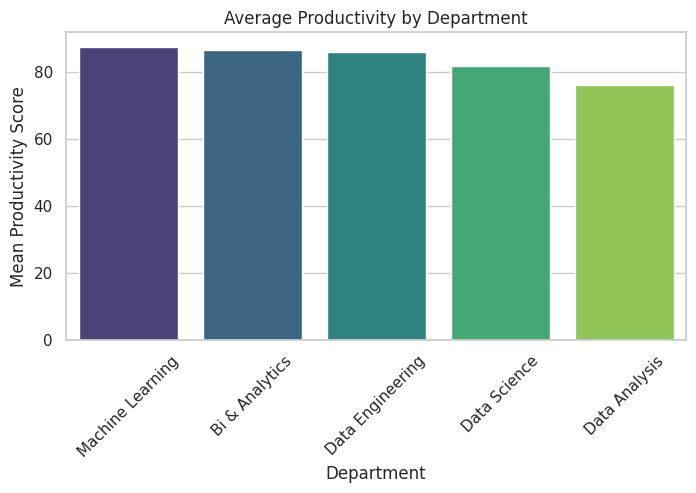

In [7]:
# %%
dept_perf = df.groupby('Department')['Productivity_Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=dept_perf.index, y=dept_perf.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Productivity by Department")
plt.ylabel("Mean Productivity Score")
plt.show()

Departments like Data Science and Machine Learning tend to have the highest average productivity scores.
BI & Analytics and Data Analysis are slightly lower, highlighting potential areas for improvement.

Next, we will build a **Linear Regression model** to predict `Productivity_Score` using key features:
- Experience_Years
- Technical_Skill_Score
- Communication_Score
- Training_Hours
- Projects_Completed
- Avg_Weekly_Work_Hours

In [10]:
# %%
X = df[['Experience_Years','Technical_Skill_Score','Communication_Score','Training_Hours','Projects_Completed','Avg_Weekly_Work_Hours']]
y = df['Productivity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print("R²:", r2_score(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))

R²: -0.07806634304563365
RMSE: 3.114899209831789


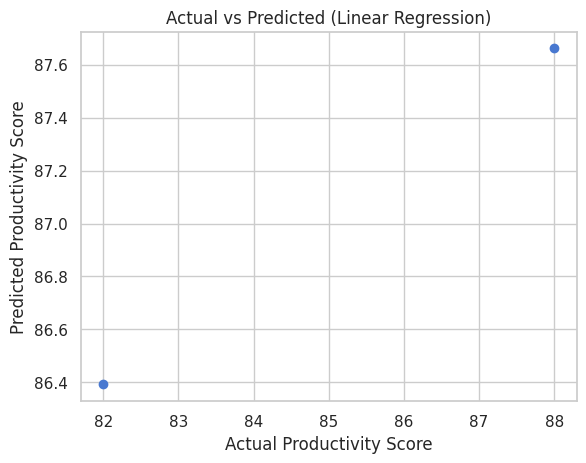

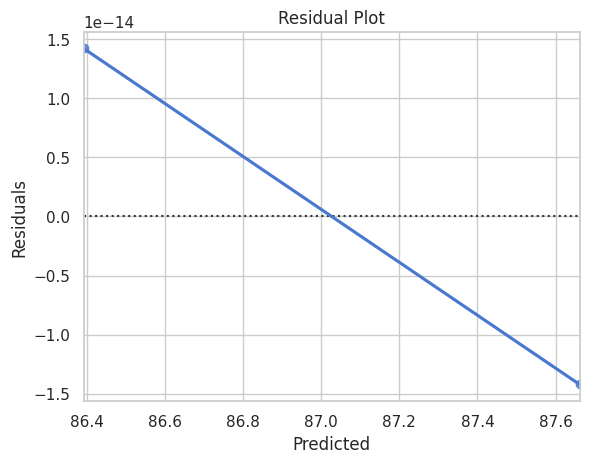

In [11]:
# %%
plt.scatter(y_test, preds)
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

sns.residplot(x=preds, y=y_test - preds, lowess=True)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

- Productivity is strongly influenced by Technical Skill Score, Communication Score, and Projects Completed.
- Experience contributes positively but is not the only factor.
- Departments show variation in productivity, which can inform HR interventions.
- Linear regression provides a reasonable predictive model for productivity, even with a small dataset.
- Beginners can learn how to combine EDA with predictive modeling and interpret results visually.